In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/Users/robertchecco/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0-beta1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

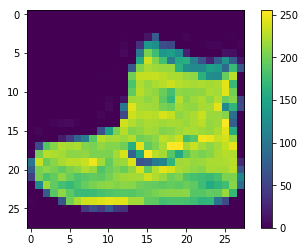

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Previously, the pixel values were [0,256?]
# I divided by 255 so the pixels are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

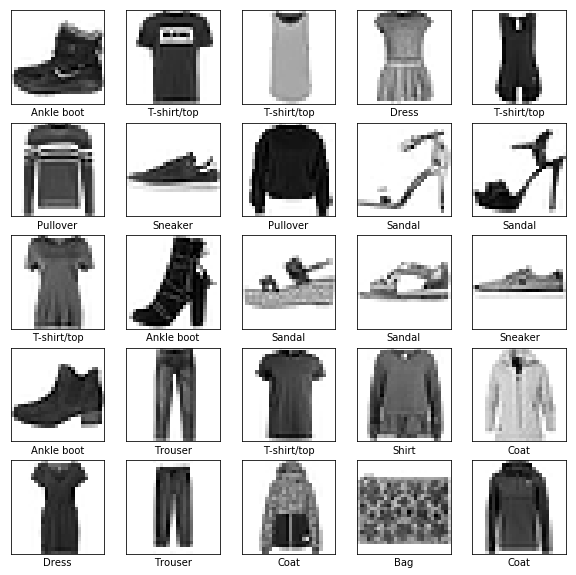

In [10]:
# Now I want to display the first 25 images from the training set and display the 
# class name below each image

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# First layer transforms 28x28 to a one-dimensional array (784 pixels)
# Second Layer is a fully connected with 128 nodes/neurons
# Third Layer is a 10-node softmax layer that returns 10 probability scores that sum to 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
# Training the model
# 1. Feed the training data into the model. 
# 2. The model learns to associate images and labels
# 3. You ask the model to make predictions about a test set

model.fit(train_images, train_labels, epochs=10)

W1120 16:09:39.462635 140736202179456 deprecation.py:323] From /Users/robertchecco/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4981 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3751 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3385 - accuracy: 0.8756
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3128 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2954 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2815 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2674 - accuracy: 0.9015
Epoch 8/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2582 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2469 - accuracy: 0.9075
Epoch 10/10
6

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3309 - accuracy: 0.8843

Test accuracy: 0.8843


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([1.18775156e-10, 1.06280714e-13, 4.45114269e-13, 2.17360661e-15,
       5.28826809e-11, 3.98538029e-03, 6.82392406e-11, 8.65138602e-04,
       3.51457530e-09, 9.95149553e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

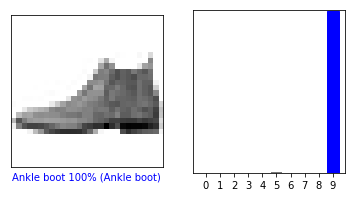

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

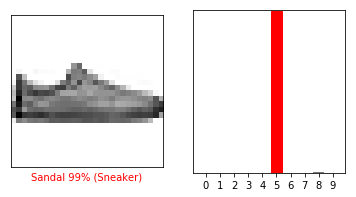

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

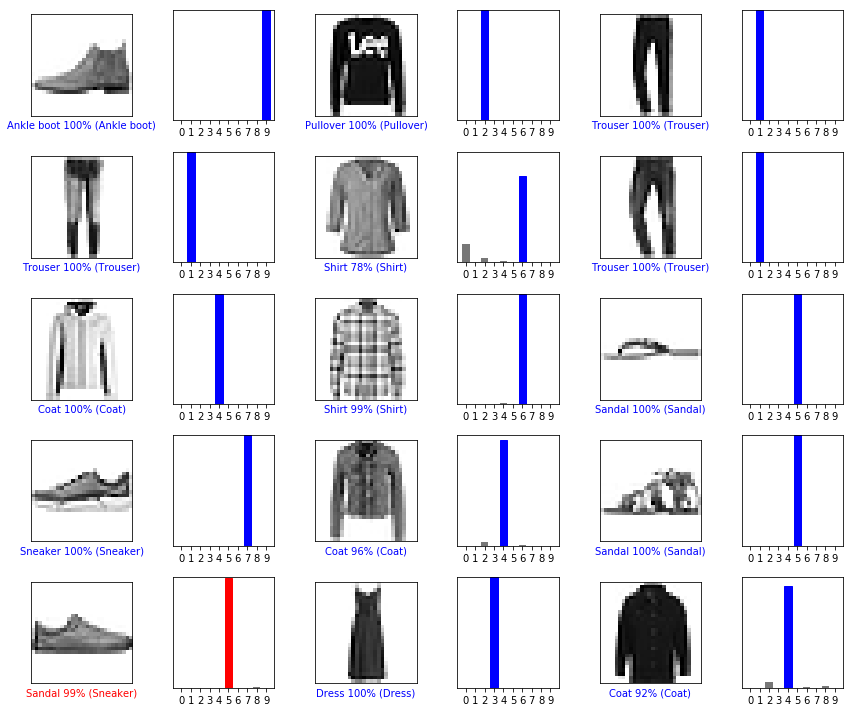

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Grab an image from the test dataset.

img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2132866e-04 2.4152159e-13 9.9531639e-01 1.5875857e-12 4.3636602e-03
  1.0332666e-12 1.9863724e-04 2.2576581e-16 6.0513310e-09 1.3224594e-14]]


In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2